# Single Impulse Orbital Change

The simplest case of an orbit change is one that only requires a single impulse. Examples of this kind of maneuver are [orbit insertion](https://en.wikipedia.org/wiki/Orbit_insertion) and deorbit burns.

For any single-impulse orbital maneuver, the initial and final orbits must intersect at some point. The two velocities required for Eq. {eq}`eq:single-impulse-delta-v` are determined at the point of intersection of the two orbits. Eq. {eq}`eq:single-impulse-delta-v` can be simplified to involve only velocity magnitudes when the velocity vectors are parallel at the point of intersection.

Let's consider a case where we want to deorbit a spacecraft from low Earth orbit. To deorbit a spacecraft, we need to place it in an orbit that will intersect the atmosphere. Once in the atmosphere, drag will take over and reduce the velocity to the terminal velocity. As a simplification, we will neglect the atmosphere. This means we will determine the true anomaly when the spacecraft reaches the surface of the earth, or when the orbital radius is equal to the earth's radius.

Initially, the spacecraft is in a circular orbit at 1000 km altitude. We define the apse line pointing to the right along the $x$ axis, as usual. When the spacecraft reaches the apse line, an impulsive thrust is provided to put the spacecraft on the deorbit trajectory, which will be an ellipse. We would like the spacecraft to impact at a point 145° from the impulse point. This situation is shown in {numref}`fig:single-impulse-example-orbit`.

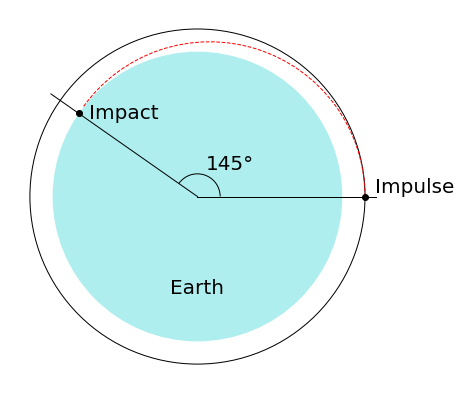

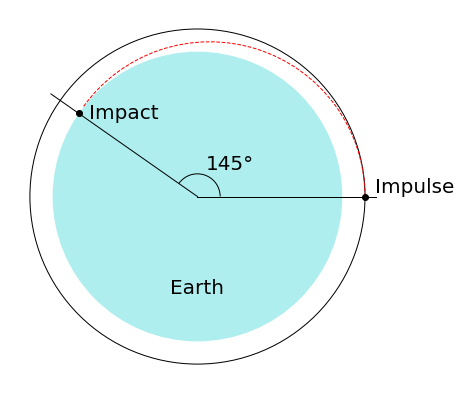

In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Arc
import numpy as np
from myst_nb import glue

R_E = 6378  # km
orbit_radius = 1000  # km
mu = 398_600  # km**2/s**3
theta = np.radians(35)
earth = Circle((0, 0), R_E, facecolor="paleturquoise", edgecolor="None")
orbit = Circle((0, 0), R_E + orbit_radius, facecolor="None", edgecolor="black")

e_2 = orbit_radius / (R_E + orbit_radius + R_E * np.cos(theta))
h_2 = np.sqrt((R_E + orbit_radius) * mu * (1 - e_2))
a = h_2**2 / mu / (1 - e_2**2)
b = a * np.sqrt(1 - e_2**2)
transfer = Arc((R_E + orbit_radius - a, 0), 2*a, 2*b, theta2=np.degrees(np.pi - theta),
               edgecolor="red", linestyle="--")
A = (R_E + orbit_radius, 0)
B = (R_E * np.cos(np.pi - theta), R_E * np.sin(np.pi - theta))

fig, ax = plt.subplots(figsize=(7, 7))
plt.rc("font", size=20)
ax.set_aspect("equal")
ax.set_axis_off()
ax.set_clip_on(False)
ax.set_xlim(-R_E - orbit_radius*2, R_E + orbit_radius*2)
ax.set_ylim(-R_E - orbit_radius*2, R_E + orbit_radius*2)
ax.add_patch(earth)
ax.add_patch(orbit)
ax.add_patch(transfer)
ax.plot(*A, "ko")
ax.plot(*B, "ko")
ax.annotate("Impulse", xy=A, xytext=(10, 10), textcoords="offset points", ha="left", va="center")
ax.annotate("Impact", xy=B, xytext=(10, 10), textcoords="offset points", ha="left", va="top")
ax.annotate("Earth", xy=(0, -4000), ha="center", va="center")
ax.plot([0, (R_E + orbit_radius + 500) * np.cos(np.pi - theta)], [0, (R_E + orbit_radius + 500) * np.sin(np.pi - theta)], color="black", lw=1)
ax.plot([0, R_E + orbit_radius + 500], [0, 0], color="black", lw=1)
ax.add_patch(Arc((0, 0), 2000, 2000, theta2=np.degrees(np.pi - theta)))
ann = (np.pi - theta) / 2
ax.annotate(f"{np.degrees(np.pi - theta):.0F}°", xy=(1250 * np.cos(ann), 1250*np.sin(ann)))
glue("single-impulse-example-orbit", fig, display=False)

:::{glue:figure} single-impulse-example-orbit
:name: fig:single-impulse-example-orbit

A deorbit maneuver conducted by a providing a single impulse to the spacecraft.
:::

We are interested in calculating the $\Delta v$ required to perform this maneuver. Since the impact orbit and the circular orbit intersect at one point, we can use a single impulse transfer to perform the maneuver. We will choose the impact trajectory such that the velocity vectors are parallel for the circular and impact orbits at the impulse point. This means we can work entirely in magnitudes.

To find $\Delta v$, we need to calculate two velocities:

1. The velocity on the circular orbit, $v_1$
2. The velocity on the impact orbit at the impulse point, $v_2$

The initial orbit is a circular orbit, with velocity given by Eq. {eq}`eq:circular-orbit-velocity`:

:::{math}
v_1 = \sqrt{\frac{\mu}{z_0 + R_E}}
:::

where $z_0$ is the initial altitude and $R_E$ is the radius of the earth.

Although the impact orbit is only a segment of the elliptical orbit, it nonetheless has the same properties as any other elliptical orbit. Since we chose for the velocity vectors to be parallel at the impulse point, the impulse must occur at the perigee or apogee of the impact orbit. The reason for this is that the radial velocity for a circular orbit is zero and the only places on an elliptical orbit where the radial velocity is zero are the apses.

If the impulse point is at perigee of the impact orbit, then apogee would be _further_ away from the earth and no impact would occur. Thus, the impulse point must be the _apogee_ of the impact orbit and perigee is inside the earth, on the opposite side of the earth from the impulse point.

Thus, the velocity on the impact orbit at the impulse point is the apogee velocity, given by:

:::{math}
v_2 = v_a = \frac{h}{r_a} = \frac{h}{R_E + z_0}
:::

where $r_a = R_E + z_0$ is the distance at apogee. Since $R_E$ and $z_0$ are known, we only need to find $h$ for the impact orbit to solve the problem.

To find the specific angular momentum, we can use the equations for an elliptical orbit. The radial coordinate at apogee is given by Eq. {eq}`eq:distance-to-apoapsis`, repeated here for reference:

:::{math}
r_a = \frac{h^2}{\mu}\frac{1}{1 - e}
:::

The choice of location of perigee means that the apse line of the impact orbit actually points to the _left_ on {numref}`fig:single-impulse-example-orbit`. From apogee of the impact orbit until the time of impact, the satellite will be approaching perigee. Thus, the true anomaly will be larger than 180°.

At the impact point, $\nu =$ 180° + 145° and $r = R_E$. Thus:

:::{math}
R_E = \frac{h^2}{\mu}\frac{1}{1 + e\cos\nu}
:::

Now we have two equations and two unknowns, $h$ and $e$. It turns out to be easier to solve for $e$ first:

:::{math}
:label: eq:single-impulse-example-e
e = \frac{z_0}{R_E \left(1 + \cos\nu\right) + z_0}
:::

Then, Eq. {eq}`eq:distance-to-apoapsis` is used to find $h$.

In [2]:
import numpy as np

R_E = 6378  # km
mu = 398_600  # km**2/s**3

z_0 = 1000 # km
impact_point = np.radians(145)
nu = np.pi + impact_point

r_a = R_E + z_0

v_1 = np.sqrt(mu / r_a)

# It turns out to be easier to solve for e first and then for h
e = z_0 / (z_0 + R_E * (1 + np.cos(nu)))
h = np.sqrt(r_a * mu * (1 - e))

v_2 = h / r_a

Δv = v_2 - v_1
propellant_fraction = 1 - np.exp(-abs(Δv) / (250 * 9.81E-3))

In [3]:
glue("single-impulse-delta-v", Δv, display=False)
glue("single-impulse-propellant-fraction", propellant_fraction, display=False)

-0.29764207559308975

0.11428736609712109

The required velocity change is $\Delta v =$ {glue:text}`single-impulse-delta-v:.4f` km/s, meaning the spacecraft must slow down by that amount to transfer to the impact orbit. This requires an expenditure of $\Delta m / m =$ {glue:text}`single-impulse-propellant-fraction:.2%` of the spacecraft mass, assuming the specific impulse is $I_{sp} =$ 250 s, a typical value for chemical propulsion.